In [100]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import statsmodels.api as sm 
import statsmodels.tools
import seaborn as sns #pretty visualisations
import matplotlib.pyplot as plt
import re

In [3]:
# Read in data
df = pd.read_csv('Life Expectancy Data.csv')

In [4]:
df.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7  

[5 rows x 21 columns]

In [8]:
# Check for nulls
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [10]:
# Check Datatypes 
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [ ]:
# Check number of observations
df.shape

In [ ]:
df.describe()

## Train Test Split

In [12]:
# Allocate features and target column
feature_cols = list(df.columns)
feature_cols.remove('Life_expectancy')

In [14]:
# Assign to X and y
X = df[feature_cols]
y = df['Life_expectancy']

In [16]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split (X,  y, test_size = 0.2, random_state = 10)

In [18]:
# check split worked
print(X_train.shape)
print(y_test.shape)

(2291, 20)
(573,)


In [20]:
#X_train.shape[0] == y_train.shape[0]
X_test.shape[0] == y_test.shape[0]

True

In [22]:
X_train.head()

Country          Region  Year  Infant_deaths  \
1680         Tajikistan            Asia  2007           41.7   
2675            Burundi          Africa  2003           85.7   
2247           Bulgaria  European Union  2014            7.3   
2088             Norway  Rest of Europe  2011            2.5   
2331  Equatorial Guinea          Africa  2014           69.9   

      Under_five_deaths  Adult_mortality  Alcohol_consumption  Hepatitis_B  \
1680               48.8         151.8545                 0.54           84   
2675              138.1         353.0270                 6.37           87   
2247                8.7         139.2615                10.30           95   
2088                3.1          64.7610                 6.44           88   
2331               96.8         327.5505                 8.64           53   

      Measles   BMI  Polio  Diphtheria  Incidents_HIV  GDP_per_capita  \
1680       90  24.8     85          86           0.10             699   
2675       57  20.8     75          82           1.09             298   
2247       89  26.3     88          88           0.03            6797   
2088       94  26.4     94          94           0.04           72195   
2331       64  23.9     55          20           4.04           12927   

      Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
1680            7.06                          3.8                       3.8   
2675            6.91                          8.5                       8.5   
2247            7.22                          1.9                       1.9   
2088            4.95                          0.7                       0.7   
2331            1.12                          8.5                       8.4   

      Schooling  Economy_status_Developed  Economy_status_Developing  
1680       10.5                         0                          1  
2675        2.1                         0                          1  
2247       10.9                         1                          0  
2088       12.8                         1                          0  
2331        5.5                         0                          1

## EDA

In [ ]:
df.describe()

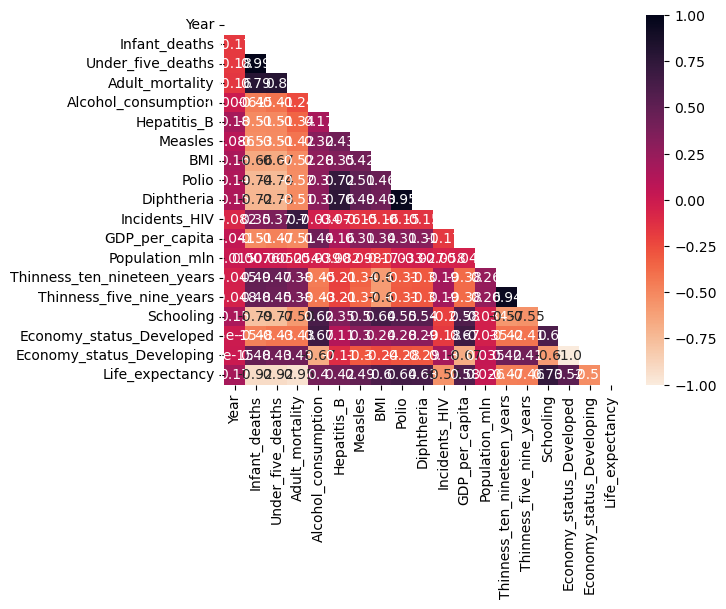

In [24]:
## Correlations
sns.heatmap(df.corr(numeric_only = True), 
            annot = True,
           cmap = 'rocket_r',
           vmin = -1,
           vmax = 1,
           fmt = '.2',
           mask = np.triu(df.corr(numeric_only = True)))

plt.show()

### BMI

In [ ]:
# Scatterplot of BMI vs Life Expectancy
sns.scatterplot(data = df, x = 'Life_expectancy', y= 'BMI')
plt.show()

# Boxplot of BMI 
plt.figure(figsize = (20, 5))
sns.boxplot(data = df['BMI'],
            orient = 'h')
plt.show()

### GDP_per_capita
* Exponential curve
* Will need transforming - log

In [ ]:
sns.scatterplot(data = df, x= 'Life_expectancy', y = 'GDP_per_capita')
plt.show()

### Schooling
* Relatively strong correlation

In [ ]:
sns.scatterplot(data =df, x ='Life_expectancy',y='Schooling')
plt.show()

### Polio

* unsure on whether this is linear really?
* Some outliers

In [ ]:
sns.scatterplot(data = df, x = 'Life_expectancy', y= 'Polio')
plt.show()

plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Polio'],
            orient = 'h')
plt.show()

### Strong correlation between Diphtheria and Polio 

In [ ]:
sns.scatterplot(data = df, x= 'Diphtheria', y ='Polio')
plt.show()

### Strong correlation between thinnness of 5-9yrs and 10-19yrs

* Linear relationship
* Some outliers in both variables
* Potential of Multicollinearity

In [ ]:
sns.scatterplot(data = df, x ='Thinness_ten_nineteen_years', y= 'Thinness_five_nine_years')
plt.show()

#boxplot thinness 10-19
plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Thinness_ten_nineteen_years'],
            orient = 'h')
plt.show()

# boxplot for thinness 5-9
plt.figure(figsize = (20, 5))
sns.boxplot(data = df['Thinness_five_nine_years'],
            orient = 'h')
plt.show()

## Feature Engineering 

In [102]:
def feature_eng (df):
    df = df.copy()

    #removing columns
    df = df.drop(columns = ['Country'])
    df = df.drop(columns = ['Economy_status_Developing'])
    df = df.drop(columns = ['Infant_deaths'])    
    
    #calculated field
    df['avg_thin'] = (df['Thinness_five_nine_years'] + df['Thinness_ten_nineteen_years']) / 2
    
    #one hot encoding method
    df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'Region', dtype=int)
    
    # logging exponential data
    df['GDP_log'] = np.log(df['GDP_per_capita'])
    
    #scaling
    scaler = StandardScaler()
    df[df.columns] = scaler.fit_transform(df[df.columns])
    
    df = sm.add_constant(df)
    return df

In [73]:
X_train_fe = feature_eng(X_train)

In [30]:
X_train_fe.head()

const      Year  Under_five_deaths  Adult_mortality  \
1680    1.0 -0.085510           0.137039        -0.351286   
2675    1.0 -0.949477           2.151642         1.393963   
2247    1.0  1.426430          -0.767615        -0.460535   
2088    1.0  0.778456          -0.893951        -1.106856   
2331    1.0  1.426430           1.219916         1.172945   

      Alcohol_consumption  Hepatitis_B   Measles       BMI     Polio  \
1680            -1.083147    -0.020056  0.677760 -0.114456 -0.097782   
2675             0.383955     0.169292 -1.085028 -1.963016 -0.758410   
2247             1.372928     0.674219  0.624343  0.578754  0.100406   
2088             0.401571     0.232408  0.891432  0.624968  0.496783   
2331             0.955194    -1.976650 -0.711103 -0.530382 -2.079666   

      Diphtheria  ...  avg_thin  Region_Asia  \
1680   -0.020917  ... -0.239986     2.424846   
2675   -0.279951  ...  0.835109    -0.412397   
2247    0.108600  ... -0.674599    -0.412397   
2088    0.497150  ... -0.949091    -0.412397   
2331   -4.294968  ...  0.823672    -0.412397   

      Region_Central America and Caribbean  Region_European Union  \
1680                             -0.347623              -0.423924   
2675                             -0.347623              -0.423924   
2247                             -0.347623               2.358913   
2088                             -0.347623              -0.423924   
2331                             -0.347623              -0.423924   

      Region_Middle East  Region_North America  Region_Oceania  \
1680           -0.286691             -0.126351       -0.258979   
2675           -0.286691             -0.126351       -0.258979   
2247           -0.286691             -0.126351       -0.258979   
2088           -0.286691             -0.126351       -0.258979   
2331           -0.286691             -0.126351       -0.258979   

      Region_Rest of Europe  Region_South America   GDP_log  
1680              -0.309270             -0.272166 -1.289892  
2675              -0.309270             -0.272166 -1.884274  
2247              -0.309270             -0.272166  0.295892  
2088               3.233419             -0.272166  1.943239  
2331              -0.309270             -0.272166  0.744062  

[5 rows x 27 columns]

In [32]:
# Check no nulls in our engineered data
X_train_fe.isnull().sum()

const                                   0
Year                                    0
Under_five_deaths                       0
Adult_mortality                         0
Alcohol_consumption                     0
Hepatitis_B                             0
Measles                                 0
BMI                                     0
Polio                                   0
Diphtheria                              0
Incidents_HIV                           0
GDP_per_capita                          0
Population_mln                          0
Thinness_ten_nineteen_years             0
Thinness_five_nine_years                0
Schooling                               0
Economy_status_Developed                0
avg_thin                                0
Region_Asia                             0
Region_Central America and Caribbean    0
Region_European Union                   0
Region_Middle East                      0
Region_North America                    0
Region_Oceania                    

In [34]:
# Check datatypes of our engineered data
X_train_fe.dtypes

const                                   float64
Year                                    float64
Under_five_deaths                       float64
Adult_mortality                         float64
Alcohol_consumption                     float64
Hepatitis_B                             float64
Measles                                 float64
BMI                                     float64
Polio                                   float64
Diphtheria                              float64
Incidents_HIV                           float64
GDP_per_capita                          float64
Population_mln                          float64
Thinness_ten_nineteen_years             float64
Thinness_five_nine_years                float64
Schooling                               float64
Economy_status_Developed                float64
avg_thin                                float64
Region_Asia                             float64
Region_Central America and Caribbean    float64
Region_European Union                   

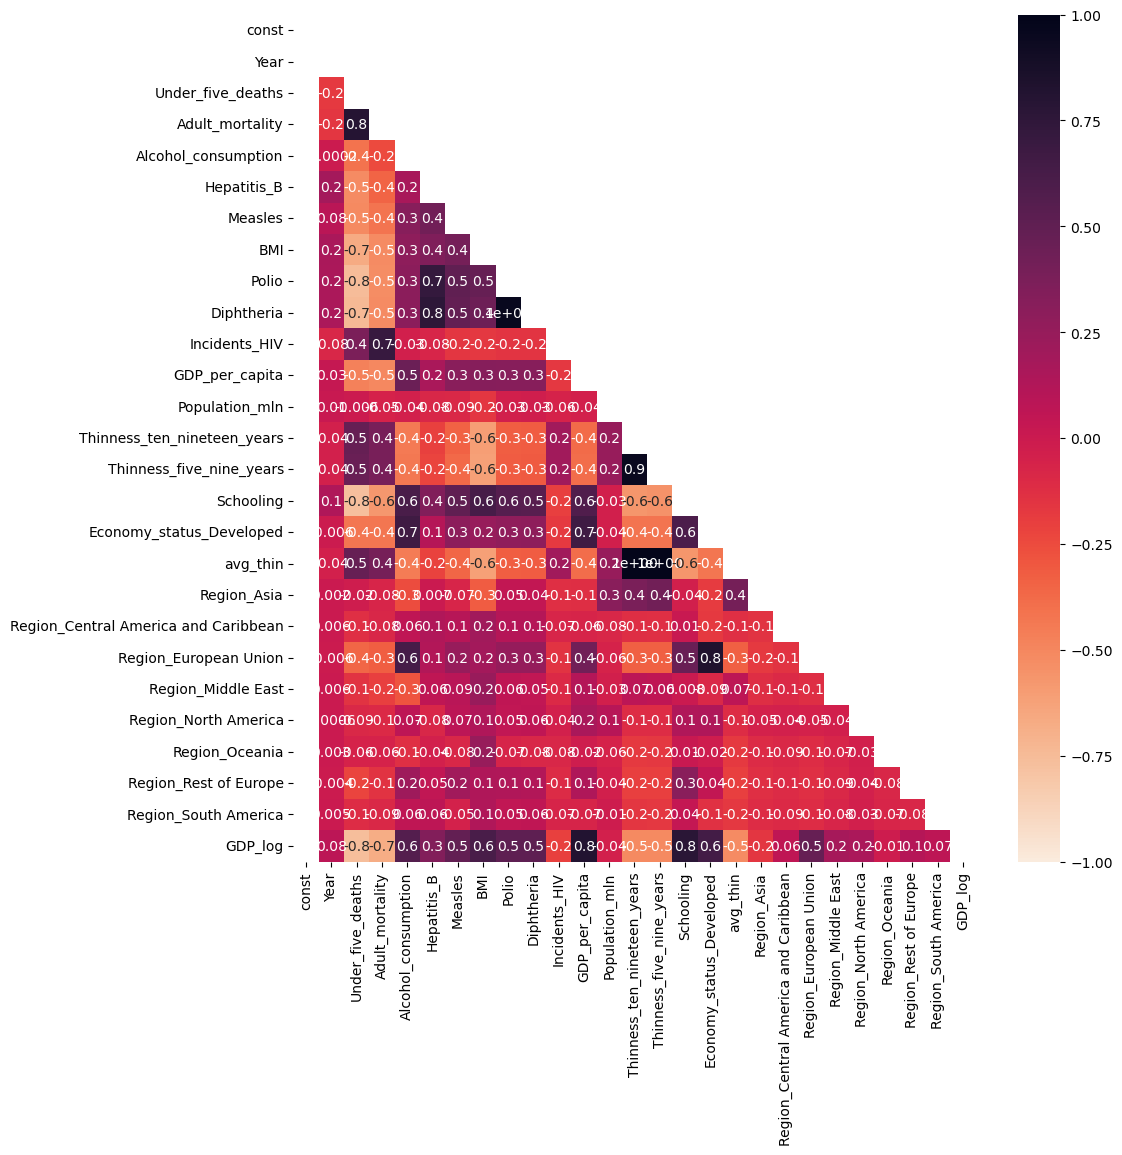

In [407]:
plt.figure(figsize = (11, 11))
sns.heatmap(X_train_fe.corr(numeric_only = True), 
            annot = True,
            cmap = 'rocket_r',
            vmin = -1,
            vmax = 1,
            fmt = '.1',
            mask = np.triu(X_train_fe.corr(numeric_only = True)))
 
plt.show()

In [104]:
#remove population, measles - high p-values
#remove alcohol consumptoin reduced region_middle_east's p-value!!

feature_cols = ['const', 'Year','Under_five_deaths', 'Adult_mortality',
                  'Polio','Diphtheria','BMI','Hepatitis_B',
                 'Incidents_HIV', 'avg_thin', 'GDP_per_capita',
                 'Schooling', 'Economy_status_Developed', 'Region_Asia',
                 'Region_Central America and Caribbean',  'Region_European Union', 'Region_Middle East', 
                 'Region_North America', 'Region_Oceania','Region_Rest of Europe', 'Region_South America',
                 'GDP_log']


In [79]:
lin_reg = sm .OLS (y_train, X_train_fe [feature_cols])
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     6479.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:45:10   Log-Likelihood:                -3673.6
No. Observations:                2291   AIC:                             7391.
Df Residuals:                    2269   BIC:                             7517.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   68.8680      0.025   2727.678      0.000      68.818      68.918
Year                                     0.1788      0.027      6.604      0.000       0.126       0.232
Under_five_deaths                       -3.4699      0.080    -43.134      0.000      -3.628      -3.312
Adult_mortality                         -5.3416      0.071    -74.717      0.000      -5.482      -5.201
Polio                                    0.3171      0.090      3.508      0.000       0.140       0.494
Diphtheria                              -0.2185      0.093     -2.354      0.019      -0.401      -0.036
BMI                                     -0.3746      0.050     -7.448      0.000      -0.473      -0.276
Hepatitis_B                             -0.1246      0.041     -3.052      0.002      -0.205      -0.045
Incidents_HIV                            0.1994      0.045      4.390      0.000       0.110       0.289
avg_thin                                -0.1119      0.039     -2.861      0.004      -0.189      -0.035
GDP_per_capita                           0.1288      0.056      2.291      0.022       0.019       0.239
Schooling                                0.2502      0.058      4.319      0.000       0.137       0.364
Economy_status_Developed                 1.0055      0.067     14.908      0.000       0.873       1.138
Region_Asia                              0.0867      0.040      2.189      0.029       0.009       0.164
Region_Central America and Caribbean     0.5548      0.037     15.133      0.000       0.483       0.627
Region_European Union                   -0.2393      0.064     -3.755      0.000      -0.364      -0.114
Region_Middle East                       0.0659      0.037      1.804      0.071      -0.006       0.138
Region_North America                     0.0820      0.030      2.689      0.007       0.022       0.142
Region_Oceania                          -0.2076      0.035     -5.856      0.000      -0.277      -0.138
Region_Rest of Europe                    0.1189      0.040      2.946      0.003       0.040       0.198
Region_South America                     0.3806      0.034     11.173      0.000       0.314       0.447
GDP_log                                  0.5014      0.080      6.270      0.000       0.345       0.658
==============================================================================
Omnibus:                       17.000   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.707
Skew:                           0.108   Prob(JB):                     1.93e-05
Kurtosis:                       3.425   Cond. No.                         12.9
===============================================================

In [81]:
y_pred = results.predict(X_train_fe[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train,y_pred)
print(rmse)


1.2026564209735273


In [83]:
X_test_fe = feature_eng(X_test)
X_test_fe = X_test_fe[feature_cols]

In [85]:
y_test_pred = results.predict(X_test_fe)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

1.190422612788913


## Sensitive Model

In [118]:
def feature_eng (df):
    df = df.copy()

    #removing columns
    df = df.drop(columns = ['Country'])
    df = df.drop(columns = ['Economy_status_Developing'])
    df = df.drop(columns = ['Infant_deaths'])    
    
    #calculated field
    df['avg_thin'] = (df['Thinness_five_nine_years'] + df['Thinness_ten_nineteen_years']) / 2
    
    #one hot encoding method
    df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'Region', dtype=int)
    
    #replace region names with ###
    df.columns = df.columns.str.replace(r"^(Region).*", r"Region_#####", regex=True)
    
    
    # logging exponential data
    df['GDP_log'] = np.log(df['GDP_per_capita'])
    
    #scaling
    scaler = StandardScaler()
    df[df.columns] = scaler.fit_transform(df[df.columns])
    
    df = sm.add_constant(df)
    return df

In [120]:
X_train_fe = feature_eng(X_train)

In [122]:
X_train_fe.head()

const      Year  Under_five_deaths  Adult_mortality  \
1680    1.0 -0.085510           0.137039        -0.351286   
2675    1.0 -0.949477           2.151642         1.393963   
2247    1.0  1.426430          -0.767615        -0.460535   
2088    1.0  0.778456          -0.893951        -1.106856   
2331    1.0  1.426430           1.219916         1.172945   

      Alcohol_consumption  Hepatitis_B   Measles       BMI     Polio  \
1680            -1.083147    -0.020056  0.677760 -0.114456 -0.097782   
2675             0.383955     0.169292 -1.085028 -1.963016 -0.758410   
2247             1.372928     0.674219  0.624343  0.578754  0.100406   
2088             0.401571     0.232408  0.891432  0.624968  0.496783   
2331             0.955194    -1.976650 -0.711103 -0.530382 -2.079666   

      Diphtheria  ...  avg_thin  Region_#####  Region_#####  Region_#####  \
1680   -0.020917  ... -0.239986      2.424846     -0.347623     -0.423924   
2675   -0.279951  ...  0.835109     -0.412397     -0.347623     -0.423924   
2247    0.108600  ... -0.674599     -0.412397     -0.347623      2.358913   
2088    0.497150  ... -0.949091     -0.412397     -0.347623     -0.423924   
2331   -4.294968  ...  0.823672     -0.412397     -0.347623     -0.423924   

      Region_#####  Region_#####  Region_#####  Region_#####  Region_#####  \
1680     -0.286691     -0.126351     -0.258979     -0.309270     -0.272166   
2675     -0.286691     -0.126351     -0.258979     -0.309270     -0.272166   
2247     -0.286691     -0.126351     -0.258979     -0.309270     -0.272166   
2088     -0.286691     -0.126351     -0.258979      3.233419     -0.272166   
2331     -0.286691     -0.126351     -0.258979     -0.309270     -0.272166   

       GDP_log  
1680 -1.289892  
2675 -1.884274  
2247  0.295892  
2088  1.943239  
2331  0.744062  

[5 rows x 27 columns]

In [ ]:
# Check no nulls in our engineered data
X_train_fe.isnull().sum()

In [67]:
X_train_fe.dtypes

const                                   float64
Year                                    float64
Under_five_deaths                       float64
Adult_mortality                         float64
Alcohol_consumption                     float64
Hepatitis_B                             float64
Measles                                 float64
BMI                                     float64
Polio                                   float64
Diphtheria                              float64
Incidents_HIV                           float64
GDP_per_capita                          float64
Population_mln                          float64
Thinness_ten_nineteen_years             float64
Thinness_five_nine_years                float64
Schooling                               float64
Economy_status_Developed                float64
avg_thin                                float64
Region_Asia                             float64
Region_Central America and Caribbean    float64
Region_European Union                   

In [ ]:
#minimal model              
feature_cols = ['const', 'Year', 'Alcohol_consumption', 'GDP_per_capita',
                 'Region_Asia','Region_Central America and Caribbean',  'Region_European Union', 'Region_Middle East', 
                 'Region_North America', 'Region_Oceania','Region_Rest of Europe', 'Region_South America',
                 'GDP_log', 'Population_mln', 'Schooling']

In [ ]:
lin_reg = sm .OLS (y_train, X_train_fe [feature_cols])
results = lin_reg.fit()
results.summary()

In [ ]:
y_pred = results.predict(X_train_fe[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train,y_pred)
print(rmse)